In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df = pd.read_csv("site/view.csv")
df.loc[df._lv >= 40]

,_lv,_genre,_title,_float,_diff,_attr,_clear
1770,40,"<a href=""https://popn.wiki//%E9%9B%A3%E6%98%93...",Over The Rainbow,40.000,中(+0.000±0.0),NaN,n
1771,40,"<a href=""https://popn.wiki//%E9%9B%A3%E6%98%93...",ミュージカル“5丁目物語”よりオーヴァーチュア,40.000,中(+0.000±0.0),NaN,n
1772,40,"<a href=""https://popn.wiki//%E9%9B%A3%E6%98%93...",BICYCLE,40.500,強(+0.500±0.0),NaN,n
1773,40,"<a href=""https://popn.wiki//%E9%9B%A3%E6%98%93...",大見解,39.500,弱(-0.500±0.0),NaN,c
1774,40,"<a href=""https://popn.wiki//%E9%9B%A3%E6%98%93...",H@ppy Choice,40.500,強(+0.500±0.0),NaN,n
...,...,...,...,...,...,...,...
3813,50,"<a href=""https://popn.wiki//%E9%9B%A3%E6%98%93...",生命の焔纏いて,49.846,中(-0.154±0.5),NaN,n
3814,50,"<a href=""https://popn.wiki//%E9%9B%A3%E6%98%93...",ΔΟΓΜΑ,49.351,弱(-0.649±0.4),NaN,n
3815,50,"<a href=""https://popn.wiki//%E9%9B%A3%E6%98%93...",virkatoの主題によるperson09風超絶技巧変奏曲,50.267,中(+0.267±0.4),NaN,NaN
3816,50,"<a href=""https://popn.wiki//%E9%9B%A3%E6%98%93...",F/S,50.693,強(+0.693±0.3),NaN,n


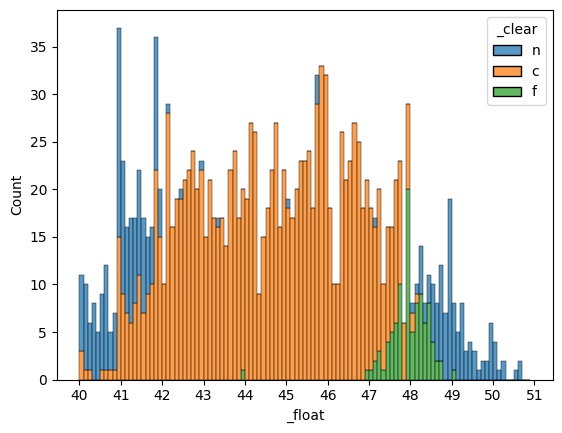

In [32]:
ax = sns.histplot(df.loc[df._lv >= 41], bins=np.arange(40, 51, 0.1), x="_float", hue="_clear", multiple="stack")
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

/tmp/ipykernel_794/2449719884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['binned'] = pd.cut(df2['_float'], bins=bins, include_lowest=True, right=True)
/tmp/ipykernel_794/2449719884.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df2.groupby(['binned', '_clear']).size().unstack(fill_value=0)


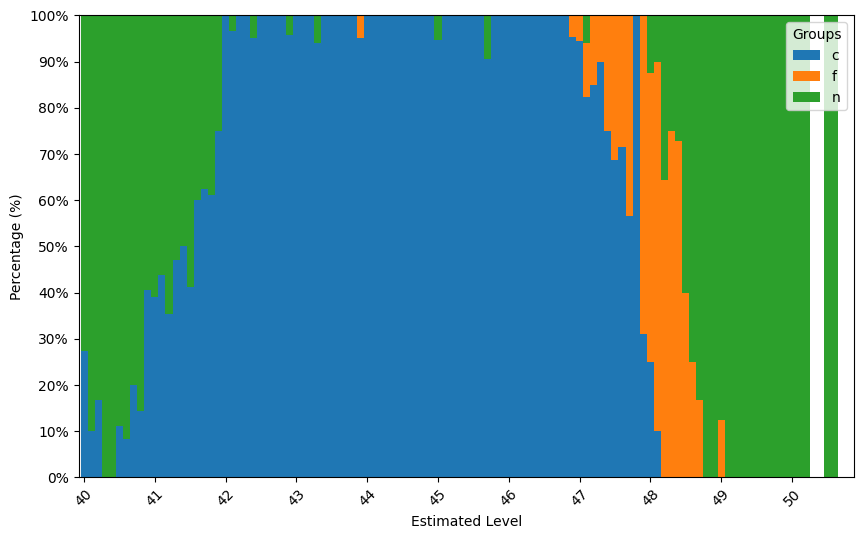

In [33]:
df2 = df.loc[df._lv >= 41]
bins = np.arange(40, 51, 0.1)
df2['binned'] = pd.cut(df2['_float'], bins=bins, include_lowest=True, right=True)

# ビンごとにカテゴリの件数を集計し、パーセンテージに変換
grouped = df2.groupby(['binned', '_clear']).size().unstack(fill_value=0)
percentage = grouped.divide(grouped.sum(axis=1), axis=0) * 100

# 100%積み上げプロットの作成
ax = percentage.plot(kind='bar', stacked=True, figsize=(10, 6), width=1.0)
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Estimated Level')

# Y軸の目盛りをパーセンテージ表示に設定
ax.set_ylim(0, 100)
plt.yticks(np.arange(0, 101, 10), [f'{x}%' for x in np.arange(0, 101, 10)])

tick_positions = np.arange(0, len(bins) - 1, 10)  # 10ビンごとの位置
tick_labels = [f'{bins[i]:.0f}' for i in tick_positions]  # 対応するラベル
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

plt.xticks(rotation=45)  # X軸ラベルの回転
plt.legend(title='Groups')
plt.show()

In [34]:
percentage

_clear,c,f,n
binned,,,
"(39.999, 40.1]",27.272727,0.0,72.727273
"(40.1, 40.2]",10.000000,0.0,90.000000
"(40.2, 40.3]",16.666667,0.0,83.333333
"(40.3, 40.4]",0.000000,0.0,100.000000
"(40.4, 40.5]",0.000000,0.0,100.000000
...,...,...,...
"(50.4, 50.5]",NaN,NaN,NaN
"(50.5, 50.6]",0.000000,0.0,100.000000
"(50.6, 50.7]",0.000000,0.0,100.000000


## 更新履歴の可視化

In [67]:
from git import Repo
import os

repo = Repo.init("site")
file_path = 'view.csv'
commits = list(repo.iter_commits(paths=file_path))
# updates = [(commit.committed_datetime, os.path.join(repo.working_tree_dir, file_path)) for commit in commits]
# updates

updates = []
month = 13 # 今は year を考慮しない
for commit in commits:
    if commit.committed_datetime.month != month:
        month = commit.committed_datetime.month
        file_content = commit.tree / file_path
        try:
            data = file_content.data_stream.read().decode('utf-8')
            updates.append((month, data))
        except IOError:
            print(f"Commit {commit.hexsha} at {commit.committed_datetime}: File does not exist in this commit.\n{'='*40}\n")

In [68]:
len(updates)

4

In [103]:
import io
df_updates = []
for month, csv in updates:
    df_update = pd.read_csv(io.StringIO(csv))

    df_update = df_update.loc[df_update._lv >= 41]
    bins = np.arange(40, 51, 0.1)
    df_update['binned'] = pd.cut(df_update['_float'], bins=bins, include_lowest=True, right=True)

    # ビンごとにカテゴリの件数を集計し、パーセンテージに変換
    df_update = df_update.groupby(['binned', '_clear']).size().unstack(fill_value=0)
    df_update = df_update.divide(df_update.sum(axis=1), axis=0) * 100
    df_update = df_update.rename(columns={"y": "c"}) # 1月用
    df_update = df_update[["c"]]
    df_update = df_update.rename(columns={"c": f"{month}"})
    df_updates.append(df_update.copy())

/tmp/ipykernel_794/994756404.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_update = df_update.groupby(['binned', '_clear']).size().unstack(fill_value=0)
/tmp/ipykernel_794/994756404.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_update = df_update.groupby(['binned', '_clear']).size().unstack(fill_value=0)
/tmp/ipykernel_794/994756404.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_update = df_u

In [104]:
df_updates = list(reversed(df_updates))
df_updates.append(percentage)
percentage_updates = pd.concat(df_updates, axis=1)

In [105]:
percentage_updates

_clear,1,2,3,4,c,f,n
binned,,,,,,,
"(39.999, 40.1]",100.0,20.000000,27.272727,27.272727,27.272727,0.0,72.727273
"(40.1, 40.2]",100.0,10.000000,10.000000,10.000000,10.000000,0.0,90.000000
"(40.2, 40.3]",100.0,16.666667,16.666667,16.666667,16.666667,0.0,83.333333
"(40.3, 40.4]",NaN,0.000000,0.000000,0.000000,0.000000,0.0,100.000000
"(40.4, 40.5]",NaN,0.000000,0.000000,0.000000,0.000000,0.0,100.000000
...,...,...,...,...,...,...,...
"(50.4, 50.5]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(50.5, 50.6]",NaN,0.000000,0.000000,0.000000,0.000000,0.0,100.000000
"(50.6, 50.7]",NaN,0.000000,0.000000,0.000000,0.000000,0.0,100.000000


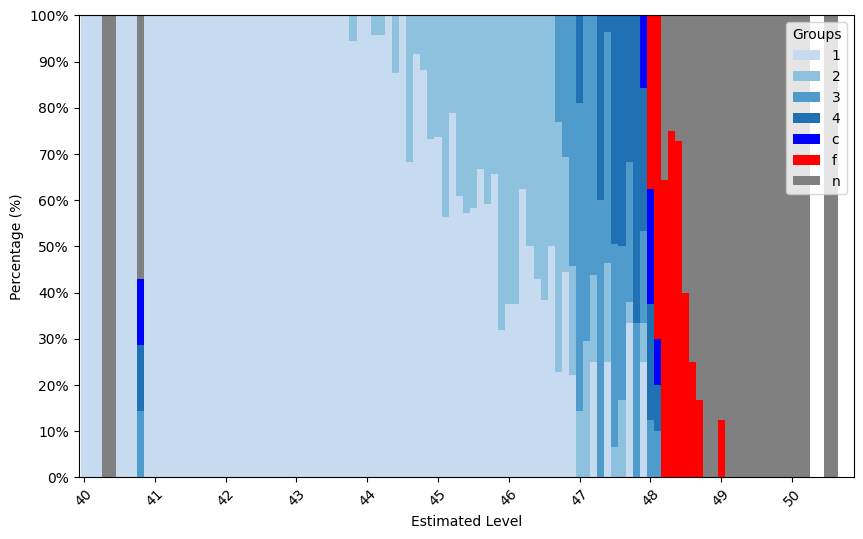

In [111]:
# 100%積み上げプロットの作成
from matplotlib.colors import ListedColormap
import matplotlib as mpl
blues = mpl.colormaps['Blues']
cmap = ListedColormap(blues(np.linspace(0.25, 0.75, len(updates))).tolist() + ["blue", "red", "gray"])
ax = percentage_updates.plot(kind='bar', stacked=True, figsize=(10, 6), width=1.0, colormap=cmap)
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Estimated Level')

# Y軸の目盛りをパーセンテージ表示に設定
ax.set_ylim(0, 100)
plt.yticks(np.arange(0, 101, 10), [f'{x}%' for x in np.arange(0, 101, 10)])

tick_positions = np.arange(0, len(bins) - 1, 10)  # 10ビンごとの位置
tick_labels = [f'{bins[i]:.0f}' for i in tick_positions]  # 対応するラベル
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

plt.xticks(rotation=45)  # X軸ラベルの回転
plt.legend(title='Groups')
plt.show()